## **Fundamentals of Robot Control:**
### **Lecture 3: Introduction to Nonlinear Systems: Phase Plane, Equilibriums, Stability and Linearization**

## **Nonlinear Analysis and Solutions of DE**
As we have discussed there are several important differences between linear and nonlinear systems, 
such as number of equilibria, superposition response on harmonic signals etc. 
However, the most fundamental and notable property is that **nonlinear systems in general does not admit closed form analytical solution** as a consequence it is desirable be able to make some predictions about behavior of nonlinear system without actually solving associated ODE but studying the qualitative behavior such as:
* Existence and continuity of solutions
* Solving for equilibrium states 
* Checking for existence of periodic trajectories, orbits, limit cycles
* Tendency to remain in certain region of state space, convergence, stability 

Such analysis is usually performed used wider variety of approaches and mathematical tools including:
* Graphical methods such as **phase portraits** 
* Approximations of local behavior via **linearization**
* Geometrical methods and **nonlinear transformations**
* The "testing-functions" tools, such as **describing functions** and **Lyapunov method**


### **On the solutions of Nonlinear DE**

Many features that are taken for granted for solutions of linear systems do not hold for nonlinear ones. 

One may roughly classify the solutions of $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x},t)$ as follows:

1. At least one solution (**existence**)
2. Exactly one solution for small values of $t$ (**local existence and uniqueness**)
3. Exactly one solution for $t\in [0,\infty)$ (**global existence and uniqueness**)
4. Exactly one solution for $t\in [0,\infty)$ and this solution is continuesly depend on initial condition $\mathbf{x}_0$ (**well posedness**)



**Example 1**:

Consider the following equation:
$$
    \dot{x} = -\text{sign}(x)
$$
where:
$$
    \text{sign}(x) = 
    \begin{cases}
        1, \quad \text{if} \ x > 0  \\
        0 \quad \text{if} \ x = 0\\ 
        -1 \quad \text{if} \ x < 0\\ 
    \end{cases}
$$

It is easy to se that there is **no continues differentiable solution** $x(t)$, so even first statement is false for this equation

**Example 2**:

Consider the following equation:
\begin{equation*}
    \dot{x} = \frac{1}{2 x}
\end{equation*}
with **two possible** solutions:
\begin{equation*}
    x(t) = \pm \sqrt{c+t}
\end{equation*}
so even first statement is true while second is false


**Example 3**:

Consider the following equation:
\begin{equation*}
    \dot{x} = 1 + x^2, \ x_0 = 0
\end{equation*}
Over time interval $t\in [0,\pi/2)$ the solution is given by:
\begin{equation*}
    x(t) = \tan(c+t)
\end{equation*}
However, for $t \rightarrow\pi/2$ the state $\mathbf{x}\rightarrow \infty$ we call this, so there is no continuously differentiable solution of equation above on time interval $t\in [0,\infty)$, thus the first two statements holds, but third one is false. 



### **Phase Plane Analysis**

Phase plane analysis is a **graphical method** for studying second-order systems, which
was introduced well before the turn of the century by mathematicians such as Henri
Poincare. The basic idea of the method is to generate the vector field of governing second-
order dynamical system. In such a way, information concerning stability
and other motion patterns of the system can be obtained. 

Phase plane analysis has a number of useful properties:
* allows us to **visualize** what goes on in a nonlinear system without having to solve ODE analytically.
* not restricted to small or smooth **nonlinearities**, but applies equally well
to all nonlinearities. 
* some practical control systems can indeed be adequately approximated as second-order systems, and the
phase plane method can be used easily for their analysis. 

Conversely, of course, the fundamental disadvantage of the method is that it is restricted to second-order (or first-
order) systems, because the graphical study of higher-order systems is computationally and geometrically complex.

### **Phase Portraits**

The phase plane method is concerned with the graphical study of second-order
autonomous systems described by:

\begin{equation*}
\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}),\quad \mathbf{x} \in \mathbb{R}^2 
\end{equation*}

geometrically, the state space of this system is a plane having $x_1$, and $x_2$ as
coordinates. We call this plane the **phase plane**.


The representation of solution from initial conditions $\mathbf{x}(0) = \mathbf{x}_0$ on phase plain is called a phase
trajectory. 

A family of phase trajectories corresponding to various initial $\mathbf{x}_0$
conditions with associated vectors pointing to the direction of $\dot{\mathbf{x}}$ is a **phase portrait of a system** .

### **Constructing the Phase Portraits**
There are variety of different approaches of constructing the phase portraits, including analytical techniques, isoclines etc, however nowadays the most phase portraits are **routinely computer-generated**. To build one in python one may use the `streamplot` routine of [matplotlib package](https://matplotlib.org/2.0.2/users/tutorials.html). 

Let us draw the phase portrait of simple linear oscillator:
\begin{equation*}
    \ddot{x} + x = 0, \ x_0 = c, \dot{x}_0 = 0 
\end{equation*}

First we can obtain analytical solution of phase trajectory DE as follows:
\begin{equation*}
    \ddot{x} + x = \dot{x}\frac{d\dot{x}}{dx}+x \ \rightarrow \ \dot{x}^2 + x^2 = x^2_0 = c 
\end{equation*}
thus the phase portrait is the family of circles with radius defined by initial condition $x_0 = c$, let us draw this with help of `streamplot`.

In [26]:
from matplotlib.pyplot import *
rc('text', usetex=True)
from numpy import linspace, arange, meshgrid

# define the dynamics
def f(x, t):
    return x[1], -x[0]
# Define the range for x1, x2
x_range = [2, 2]

# Prepare the grid
x1_max, x2_max = x_range
x1_span = arange(-1.1*x1_max, 1.1*x1_max, 0.1)
x2_span = arange(-1.1*x2_max, 1.1*x2_max, 0.1)
x1_grid, x2_grid = meshgrid(x1_span, x2_span)
dx1, dx2 = f([x1_grid, x2_grid], 0)


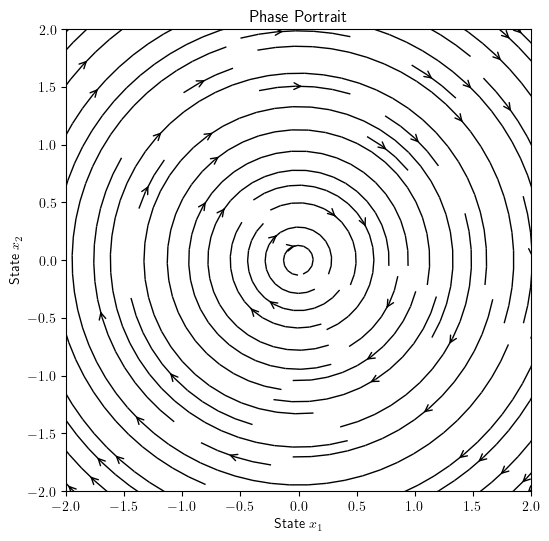

In [27]:

# draw the phase portrait
figure(figsize=(6, 6))
title('Phase Portrait')
streamplot(x1_span, x2_span, dx1, dx2,
           arrowsize=1.2, density=0.9, color='k',
           cmap='gray', linewidth=1, arrowstyle='->')
xlabel(r'State  $x_1$')
ylabel(r'State  $x_2$')
xlim([-x1_max, x1_max])
ylim([-x2_max, x2_max])
show()


In [28]:
def phase_portrait(f,
                   x_range=[1, 1],
                   cmap='gray',
                   contour=False,
                   #    show_plot=False,
                   size=(7, 5),
                   density=0.95,
                   draw_grid = False,
                   ):

    x1_max, x2_max = x_range
    x1_span = arange(-1.1*x1_max, 1.1*x1_max, 0.1)
    x2_span = arange(-1.1*x2_max, 1.1*x2_max, 0.1)
    x1_grid, x2_grid = meshgrid(x1_span, x2_span)
    dx1, dx2 = f([x1_grid, x2_grid], 0)

    dist = (x1_grid**2 + x2_grid**2)**0.5
    lw = 0.8*(2*dist + dist.max()) / dist.max()

    figure(figsize=size)
    title('Phase Portrait')

    if contour:
        contourf(x1_span, x2_span, dist, cmap=cmap, alpha=0.15)

    streamplot(x1_span, x2_span, dx1, dx2, arrowsize=1.2,   density=density, color=dist,
               cmap=cmap, linewidth=lw, arrowstyle='->')  # ,color=L, cmap='autumn', linewidth = lw)

    xlabel(r'State  $x_1$')
    ylabel(r'State  $x_2$')

    xlim([-x1_max, x1_max])
    ylim([-x2_max, x2_max])
    if draw_grid:
        grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.3)
        grid(True)
    tight_layout()
    # show()

    return None



In [29]:
from scipy.integrate import odeint

def simulate(f, init_state, t0=0, tf=1, N = 500, show_plot=False):
    t = linspace(t0, tf, N) # Create time span
    x_sol = []    
    for x_init in init_state:
        x_sol.append(odeint(f, x_init, t))  # integrate system "sys_ode" from initial state $x0$

    if show_plot:
        for sol in x_sol:
            plot(t, sol, linewidth=2.0)
        grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)     
        grid(True)
        xlim([t0, tf])
        ylabel(r'State $x$')
        xlabel(r'Time $t$ (s)')
        show()

    return x_sol 


One can use this for discontinues systems as well:

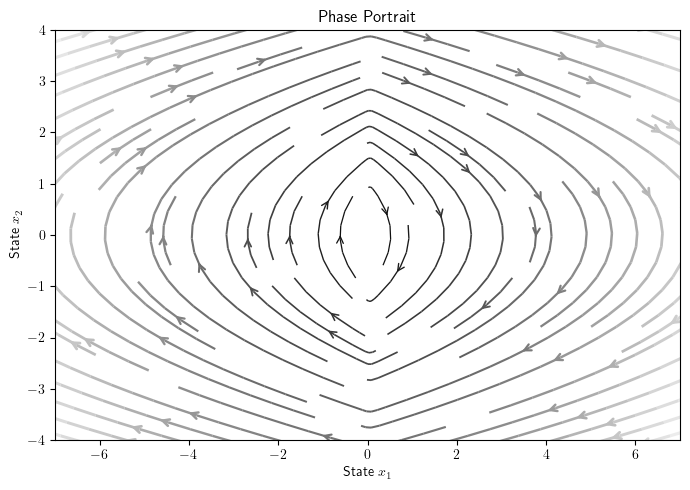

In [30]:
from numpy import sign
def f(x, t):
    return x[1], -sign(x[0])

phase_portrait(f,
               x_range=[7, 4])


It is possible to deduce if there are multiple equilibria:

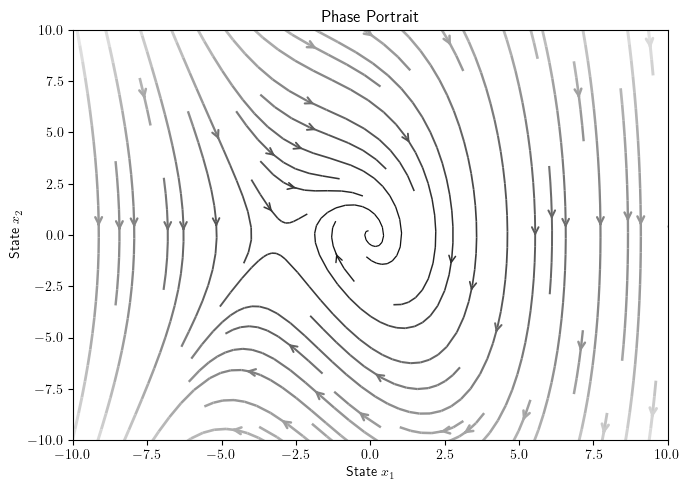

In [31]:
def f(x, t):
    return x[1], -x[1] - 3*x[0]-x[0]**2

phase_portrait(f,
               x_range=[10, 10])


Orbits and regions of attraction are obvious: 

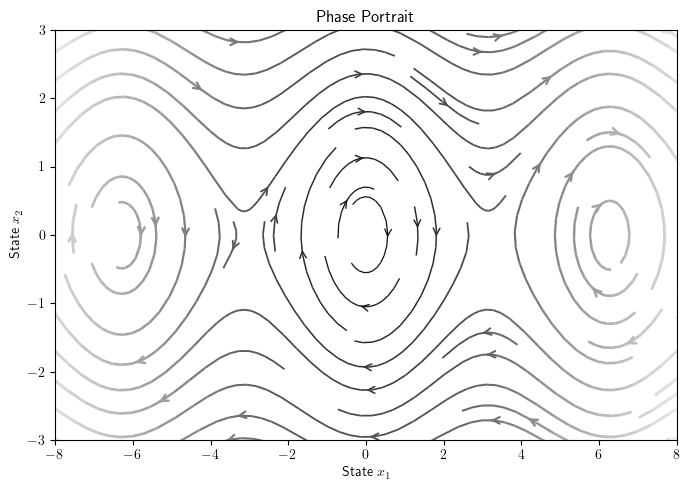

In [32]:
from numpy import sin

def f(x, t):
    return x[1], -sin(x[0]) - 0.*x[1]

phase_portrait(f,
               x_range=[8, 3],
               density=0.9)

As well as limit cycles:

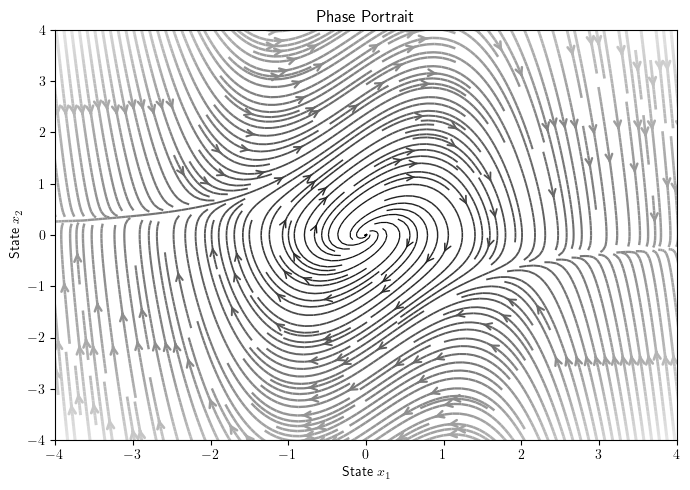

In [33]:
def f(state, t):
    x = state[0]
    dx = state[1]
    ddx = (1-x**2)*dx - x
    return dx, ddx
    
phase_portrait(f,
               x_range=[4, 4], density = 3)


### **Remark: First Order Systems**

Note that, although the phase plane method is developed primarily for second-
order systems, it can also be applied to the analysis of first-order systems of the form
\begin{equation*}
    \dot{x} = f(x)
\end{equation*}

The idea is to plot $\dot{x}$ with respect to $x$ in the phase plane. The difference now is
that the phase portrait is composed of a single curve.


For instance consider the system:
\begin{equation*}
    \dot{x} = -x + x^3
\end{equation*}


There are three singular points, defined by $-x + x^3 = 0$, namely, $x = 0, - 1 , 1$. 



The phase-portrait of the system consists of a single trajectory. 

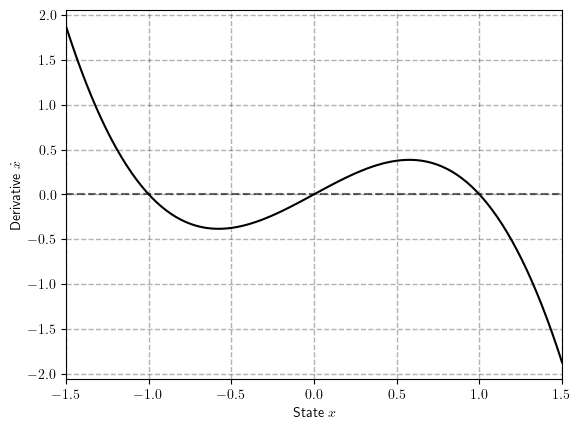

In [34]:
def f(x, t):
    return x - x**3

x_range = [-1.5, 1.5]
x = linspace(x_range[0], x_range[1], 100)
dx = f(x, 0)
plot(x, dx, color='k')
xlabel(r'State  $x$')
ylabel(r'Derivative  $\dot{x}$')
hlines(0, x_range[0], x_range[1], color='k', linestyle='--', alpha=0.6)
xlim([x_range[0], x_range[1]])
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.3)
grid(True)
show()


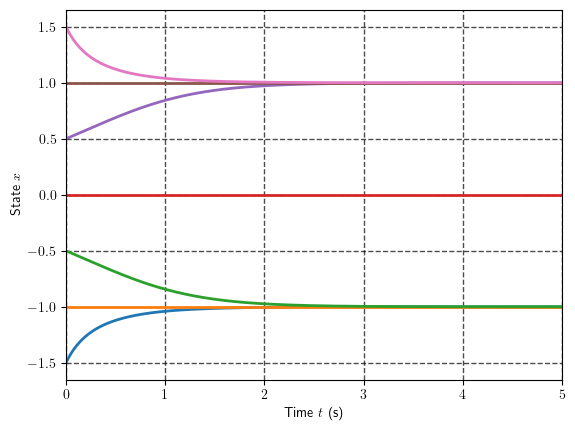

In [35]:
x = simulate(f, [-1.50001,-1,-0.5,0,0.5,1,1.50001,], tf = 5, show_plot = True)

### **Analytical Tools**

So far we have use phase plane to graphically deduce the several notable properties of linear and nonlinear dynamical systems:
* The number of **singular** or **equilibrium** points
* The behavior in the **vicinity of equilibriums**
* **Convergence** (divergence) to the particular **trajectory** or  **equilibrium**
* Existence of periodic solutions and limit cycles

The phase plane analysis is powerful visual tool, to perform many of the above, 
however it is confined to the dimension of state space $n\geq3$. 
While the most practical systems are in fact multidimensional. 

Thus it is desirable to have the tools that will help us to deduce the system behavior 
analytically and were not be hindered by the dimension $n$. 





### **Equilibriums**

One of the most natural questions ask while studying dynamical systems: Is there any special points or regions such that if system start there will remain there forever? Such regions are called invariant, and in most simple case their represented by so called singular or **equilibrium** points.

It is particular easy to find equilibriums by looking for such $\mathbf{x}_e$ that makes $\dot{\mathbf{x}}$ vanish, basicly one should just solve for roots of:
\begin{equation*}
\mathbf{f}(\mathbf{x}_e) = \mathbf{0}
\end{equation*}


Note that for linear systems one have the following:
\begin{equation*}
\mathbf{A}\mathbf{x}_e = \mathbf{0}
\end{equation*}
thus equilibriums are either trivial solution $\mathbf{x}_e = \mathbf{0}$ or nullspace $\text{Null}\{\mathbf{A}\}$ 


One may always transform the original dynamics to the new variables $\tilde{\mathbf{x}} = \mathbf{x} - \mathbf{x}_e$ such that:
\begin{equation*}
\dot{\tilde{\mathbf{x}}} = \mathbf{}\mathbf{f}(\tilde{\mathbf{x}}+\mathbf{x}_e)
\end{equation*}
we call the expression above **error** or **perturbation** dynamics

In [36]:
from sympy import symbols, solve, sin

x = symbols(r'x')
solve(-x + x**3, x)

[-1, 0, 1]

In [37]:
def f(x):
    return x[1], -x[1] - 3*x[0]-x[0]**2

x = symbols(r'x_1, x_2')

solve(f(x), x)

[(-3, 0), (0, 0)]

### **Nominal Motion**
In some practical problems, we are not concerned with stability around an equilibrium
point, but rather with the stability of a motion, i.e, whether a system will remain close
to its original motion trajectory if slightly perturbed away from it. 

Let $\mathbf{x}_d(t)$ be the solution of equation $\dot{\mathbf{x}}_d = \mathbf{f}(\mathbf{x}_d)$, i.e., the nominal motion trajectory,
corresponding to initial condition $\mathbf{x}_d(0) = \mathbf{x}_0$. 

Let us now perturb the initial condition to be $\mathbf{x}_d(0) = \mathbf{x}_0 + \delta\mathbf{x}_0$ and study the associated variation of the motion:
\begin{equation*}
\tilde{\mathbf{x}}(t) = \mathbf{x}(t) - \mathbf{x}_d(t)
\end{equation*}


Since both $\mathbf{x}_d(t)$ and $\mathbf{x}(t)$ are solutions, we have the following:
\begin{equation*}
\dot{\tilde{\mathbf{x}}} = \mathbf{f}(\mathbf{x}_d(t)+\tilde{\mathbf{x}}) - \mathbf{f}(\mathbf{x}_d(t)) = \mathbf{g}(\tilde{\mathbf{x}}, t)
\end{equation*}
with initial condition $\tilde{\mathbf{x}}_0 = \delta\mathbf{x}_0$

Note, that the perturbation dynamics is non-autonomous, due to the presence of the nominal trajectory $\mathbf{x}_d(t)$ on the right-hand side.

### **Local Behavior and Linearization**

As one note for LTI systems stability is completely determined by the eigenvalues of $\mathbf{A}$, 
however in the nonlinear case there are no notion of eigenvalues, a one of the most straightforward ideas 
is to approximate the nonlinear system in the vicente of equilibrium point using the first term of Taylor series:
 
\begin{equation*}
\dot{\mathbf{x}}
= \mathbf{f}(\mathbf{x}_e)+ 
\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\Bigr\rvert_{\mathbf{x}_e} 
(\mathbf{x} - \mathbf{x}_e)
\end{equation*}

Introducing the error $\tilde{\mathbf{x}}$ we may rewrite the equation above in linear form as follows:

\begin{equation*}
\dot{\tilde{\mathbf{x}}} = \mathbf{A}\tilde{\mathbf{x}}
\end{equation*}
where:$\mathbf{A} = \frac{\partial\mathbf{f}}{\partial\mathbf{x}}\Bigr\rvert_{\mathbf{x}_e}$ - state evaluation matrix

Thus linearization consist of three steps:
1.   Solving $\mathbf{f}(\mathbf{x}_e) = \mathbf{0}$ for equilibriums.
2.   Calculation of the system Jacobian with respect to state $\mathbf{x}$
3.   Evaluation of the resulting Jacobian in the equilibrium points $\mathbf{x}_e$

### **Stibility via Lyapunov Linearization Method**

The procedure above is known as Lyapunov linearization method and can be used to find the local stability properties of nonlinear systems 
nearby equlibrium by studying their linear aproximations as follows:

* If the linearized system is **strictly stable** (i.e, if all eigenvalues of $\mathbf{A}$ are
strictly in the left-half complex plane), then the equilibrium point is **asymptotically stable** (for the **actual nonlinear** system).
* If the linearized system is **unstable** (i.e, if at least one eigenvalue of $\mathbf{A}$ is
strictly in the right-half complex plane), then the equilibrium point is **unstable**
(for the **nonlinear system**).
* If the linearized system is **marginally stable** (i.e, all eigenvalues of $\mathbf{A}$ are in
the left-half complex plane, but **at least one of them is on the** $\text{Im}$ axis), then
one **can't conclude anything** from the linear approximation (the equilibrium
point may be stable, asymptotically stable, or unstable for the nonlinear system).


Let us demonstrate the application of Lyapunov method to study stability of equlibriums of:
\begin{equation*}
\ddot{x} = -\dot{x} - 3 x - x^2
\end{equation*}

In [38]:
from sympy import Matrix

def f(x, t):
    return x[1], -x[1] - 3*x[0]-x[0]**2


x = symbols(r'x_1, x_2')
f_sym = Matrix([f(x, 0)]).T
f_sym

Matrix([
[                  x_2],
[-x_1**2 - 3*x_1 - x_2]])

In [39]:
equlibriums = solve(f_sym, x)
print(equlibriums)

[(-3, 0), (0, 0)]


In [40]:
jacobian = f_sym.jacobian(x)
jacobian

Matrix([
[         0,  1],
[-2*x_1 - 3, -1]])

In [41]:
from sympy.utilities.lambdify import lambdify
from numpy import array
from numpy.linalg import eig

jacobian_num = lambdify([x], jacobian)

for equlibrium in equlibriums:
    x_e = array(equlibrium, dtype='double')
    A = array(jacobian_num(x_e), dtype='double')
    lambdas, Q = eig(A) 
    print(f'The matrix A for equlibrium {x_e} is: \n {A} \n Eigen values:\n {lambdas} \n')

The matrix A for equlibrium [-3.  0.] is: 
 [[ 0.  1.]
 [ 3. -1.]] 
 Eigen values:
 [ 1.30277564 -2.30277564] 

The matrix A for equlibrium [0. 0.] is: 
 [[ 0.  1.]
 [-3. -1.]] 
 Eigen values:
 [-0.5+1.6583124j -0.5-1.6583124j] 



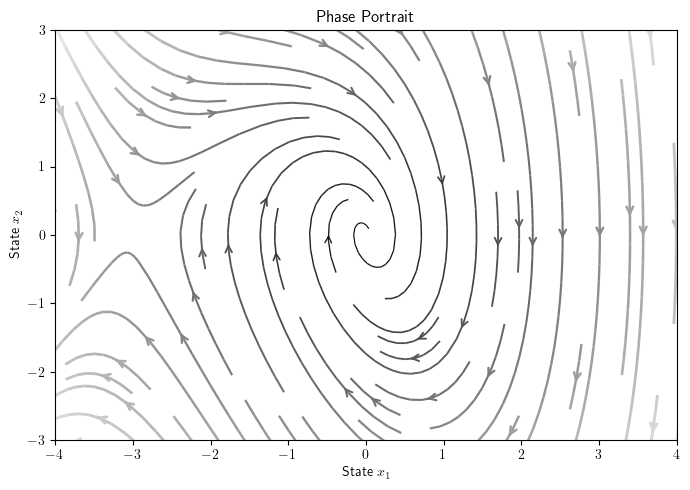

In [42]:
phase_portrait(f,
               x_range=[4, 3],
               density=0.9)

### **Linearization Based Control over Nonlinear Systems**

Similarly if one consider controlled system:
$$
\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, \mathbf{u})
$$

One may perform the linearization around the **operating point**:

\begin{equation*}
\dot{\tilde{\mathbf{x}}}
= 
\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\Bigr\rvert_{\mathbf{x}_d,\mathbf{u}_d} 
\tilde{\mathbf{x}} + 
\frac{\partial\mathbf{f}}{\partial\mathbf{u}}\Bigr\rvert_{\mathbf{x}_d,\mathbf{u}_d}  
=
\mathbf{A}
\tilde{\mathbf{x}} + 
\mathbf{B} 
\tilde{\mathbf{u}}
\end{equation*}


The operating point is found similarly to equilibrium of: $\mathbf{f}(\mathbf{x}_d, \mathbf{u}_d) = 0$


Design and analisyse of the linearized system represented by LTI is in fact identical to one you use for linear system. 
Thus the controller is still linear state feedback:
$$
\mathbf{u} = \mathbf{u}_d - \mathbf{K}\tilde{\mathbf{x}}
$$

However you will apply controller not to the linear system which you used to approximate dynamics of actual plant, thus resulting closed loop of original system will still be **nonlinear**:
\begin{equation*}
    \dot{\tilde{\mathbf{x}}} = \mathbf{f}(\tilde{\mathbf{x}},\mathbf{u}_d - \mathbf{K}\tilde{\mathbf{x}}) = 
    \mathbf{f}_c(\tilde{\mathbf{x}})
\end{equation*} 

Thus the behavior of closed loop system under influence of linear control may be drastically different from the linear one, especially if we move towards the region when linearization fails to provide the accurate description of system behavior (far from linearization point). 


**Example: Linear control over nonlinear Cart Pole.**

In order to distinguish between linear and nonlinear responses study this [colab notebook](https://colab.research.google.com/drive/1F4FbgGSjZ-rxDbnQbZft2G6R_-MC18Ld#scrollTo=uJTVJ1pCYdHV) where linearized based control is applied to cart pole system.



It is cruitial to be able to analyze stability properties of actual nonlinear system and to have at least some estimates on the regions where the linear controller is able to stabilize the system. The most widely used and elegant way to do so is based on celebrated **Lyapunov theory** and so called **Direct Method**.  